<a href="https://colab.research.google.com/github/KatyaHussary/An-Analysis-of-High-frequency-Buy-Sell-Signals/blob/main/FinalCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b><h1><center> University of Sussex </h1>
<b><center><h2><b> Msc Dissertation Code </h2>
<b><center><h2> <b>Predicting Financial Markets Trends Using Machine Learning: <h3> <b>An Analysis of High-frequency Buy-Sell Signals</h3> </h2>

<b><h4> Prepared by: Katya Hussary </h4>
<h4> <b>9/1/2023 </h4>


<hr> <hr>
<br><p style="font-family:'Courier New'">
This code was created as part of an individual project for a master's degree in Human and Social Data Science at the University of Sussex.  
The goal of publishing this code is to give a reproducible code that may be used by others on the same issue with the same data or new sets of data if feasible.

<b>Abstract</b> of this study is as follows:

The pursuit of accurate financial prediction tools has long been at the forefront of study and strategy development in the complex world of financial markets. However, machine learning (ML) models have made it possible to analyses and forecast future values of high-frequency data owing to their capacity to study and deal with massive amounts of data. Therefore, this study focuses on investigating the intersection of high-frequency financial predictions by forecasting trading signals with the application of machine learning models. The study not only tackles the inherent obstacles of analyzing such data, but it also emphasizes machine learning models' revolutionary potential within the financial markets. It has been found that machine learning models, particularly random forest classifiers, have succeeded in predicting buy and sell current trading signs on a sample of one liquid and one illiquid regular stock listed in the stock exchange market of Hong Kong (HKEX) with a testing accuracy of 90.14% and 89.62%, respectively, leading to promising predictions with a high possibility of further financial forecasting on frequent financial data through the robust application of different ML models. <br>

<b> Research main question is as follow:</b>
<li> In the presence of high-frequency data, can machine learning models forecast forthcoming buy and sell trade signals?</li><br>
<br>
<b> Sub- Questions: </b>
<li> What machine learning models should be used to fit the model?
<li> What predictors and attributes should be included in the model while training?
<li> What method might be used to generate a trading sign?
</li><br>
<hr>

In this code, we present the Python codes used for the analysis and modelling of both illiquid and liquid stocks, namely China Tianrui Group Cement Co. Ltd. and Alibaba Health Information Technology. Although the codes are largely similar, they were studied separately for each stock to account for their unique characteristics.

</p>

<h3> <b>Table of Content</b> </h3><hr>

<li> Importig Needed Libraries </li>
<li> Data Loading & Preprocessing </li>
<li> Data Description & Visualization </li>
<li> Feature Engineering </li>
<li> Target Variable & Feature Selection </li>
<li> Train-Test Split</li>
<li> Data Scaling</li>
<li> Principal Component Analysis (PCA) </li>
<li> Random Forest Classifier </li>
<li> Support Vector Classifier - Comparable Model</li>
<li> Synthetic Data Generation </li>


<h2> <b>Importing Needed Libraries</h2><hr>

In [1]:
!pip install mplfinance


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.1 MB/s eta 0:00:00


In [6]:
from google.colab import files
uploaded = files.upload()


Saving TA_Lib-0.4.24-cp39-cp39-win_amd64.whl to TA_Lib-0.4.24-cp39-cp39-win_amd64.whl


In [7]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install TA-Lib
%cd ..



--2023-08-31 07:34:10--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-08-31 07:34:10--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://cytranet.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-08-31 07:34:10--  http://cytranet.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving cytranet.dl.s

In [8]:
#Import Libararies
import datetime as dt
import talib as ta
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
import pandas as pd
import mplfinance as mpf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.metrics import accuracy_score
import pandas as pd
import io
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
import matplotlib.pyplot as plt
import pydotplus
from scipy.stats import pearsonr




<h3> <b>Data Loading & Preprocessing </h3><hr>

In [9]:
uploaded = files.upload()


Saving CTG6.xlsx to CTG6.xlsx


In [10]:
# Load the data into a data frame ...
A6 = pd.read_excel(io.BytesIO(uploaded['CTG6.xlsx']))

In [11]:
# Checking for Shape of the data, # of rows and columns.


print( '\n Six months set - shape: ', A6.shape )
print('Six months set - NULL VALUES = \n', A6.isnull().sum())


 Six months set - shape:  (12782, 11)
Six months set - NULL VALUES = 
 Local Date       0
Local Time       0
Close         7022
Net           7023
%Chg          7023
Open          7022
Low           7022
High          7022
Volume        7022
Bid            109
Ask            284
dtype: int64


In [13]:
A6.head(2)

,Local Date,Local Time,Close,Net,%Chg,Open,Low,High,Volume,Bid,Ask
0,2023-06-30 04:10:00,2023-06-30 04:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.99,6.01
1,2023-06-30 04:09:00,2023-06-30 04:09:00,6.0,0.0,0.0,5.98,5.98,6.0,2000.0,5.99,6.01


In [12]:

# Sort dataframe in ascending order by Local Time

A6 = A6.sort_values(by='Local Time')

# Reset the index -  drop the old index

A6 = A6.reset_index(drop=True)

'''
Filling in the missing columns for the analysis by applying the prior values for open, high, low, and close.
 When no transaction has occurred, fill in the volume with 0.
 '''
col_fill=  ['Open', 'High', 'Low', 'Close', 'Bid', 'Ask']

for i in col_fill:
    A6[i].fillna(method='bfill', inplace=True)

#Fill volume with zero value if no change

A6['Volume'].fillna(0, inplace=True)

'''
 Fill null values of '%ch' & 'Net'
 '''

A6['Net'] = A6['Net'].fillna(0)
A6['%Chg'] = A6['%Chg'].fillna(0)


# Drop the percentage change column
A6 = A6.drop(['%Chg'], axis= 1 )

# fillng the rest Col that has 1 missing value, mostly last row

for i in col_fill:
  A6[i].fillna(method='ffill', inplace=True)
A6.isnull().sum()




Local Date    0
Local Time    0
Close         0
Net           0
Open          0
Low           0
High          0
Volume        0
Bid           0
Ask           0
dtype: int64

<h3> <b>Data Description & Visualization  </h3><hr>

In [15]:
# Description & statistics

# Describe sets after data is cleaned
print(A6.describe())
print(A6.shape)

# Check for skewness and kurtosis for each variable
print(' A6 Skewness: ', A6.skew(), '\n A6 kurtosis: ', A6.kurt()
)

# Print Correlation matrix
correlation_matrix = A6.corr()

print(correlation_matrix)

              Close           Net          Open           Low          High  \
count  12782.000000  12782.000000  12782.000000  12782.000000  12782.000000   
mean       5.871714     -0.000078      5.872892      5.866979      5.878165   
std        0.147175      0.026637      0.146164      0.146949      0.146576   
min        5.480000     -0.670000      5.480000      5.480000      5.480000   
25%        5.760000      0.000000      5.770000      5.760000      5.770000   
50%        5.850000      0.000000      5.850000      5.850000      5.860000   
75%        5.980000      0.000000      5.980000      5.970000      5.980000   
max        7.000000      0.390000      7.000000      7.000000      7.000000   

             Volume           Bid           Ask  
count  1.278200e+04  12782.000000  12782.000000  
mean   5.320998e+03      5.834881      5.903551  
std    2.895015e+04      0.150207      0.165784  
min    0.000000e+00      4.920000      5.280000  
25%    0.000000e+00      5.730000     

<ipython-input-15-14fd965b2512>:8: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(' A6 Skewness: ', A6.skew(), '\n A6 kurtosis: ', A6.kurt()
<ipython-input-15-14fd965b2512>:8: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(' A6 Skewness: ', A6.skew(), '\n A6 kurtosis: ', A6.kurt()
<ipython-input-15-14fd965b2512>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this 

<ipython-input-13-3d98fb9b412c>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = A6.corr()


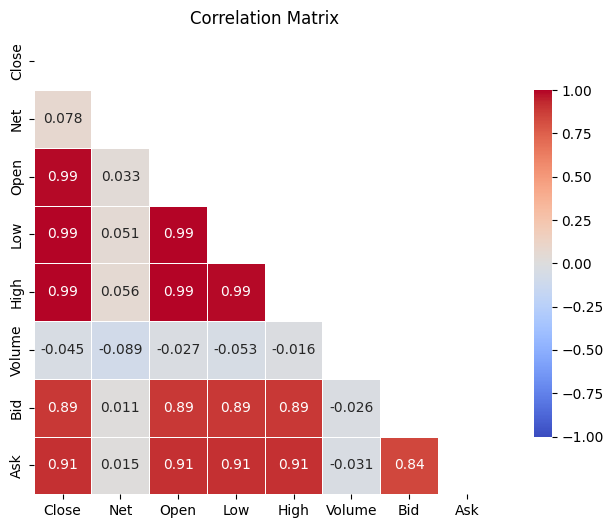

In [13]:
# Correlation Matrix

def plot_correlation_matrix(df, title="Correlation Matrix", cmap="coolwarm"):
    """
    Plot the correlation matrix.
    """
    # Compute the correlation matrix
    corr = A6.corr()

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(10, 6))

    # Generate a custom diverging colormap
    mask = np.triu(np.ones_like(corr, dtype=bool))  # Only display half of the matrix
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1,
                square=True, linewidths=.5, cbar_kws={"shrink": .75},
                annot=True, ax=ax)

    ax.set(title=title)
    plt.show()

plot_correlation_matrix(A6)

<ipython-input-14-1e9d64579e28>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = A6.corr()
<ipython-input-14-1e9d64579e28>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  p_value_matrix = A6.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*A6.corr().shape)


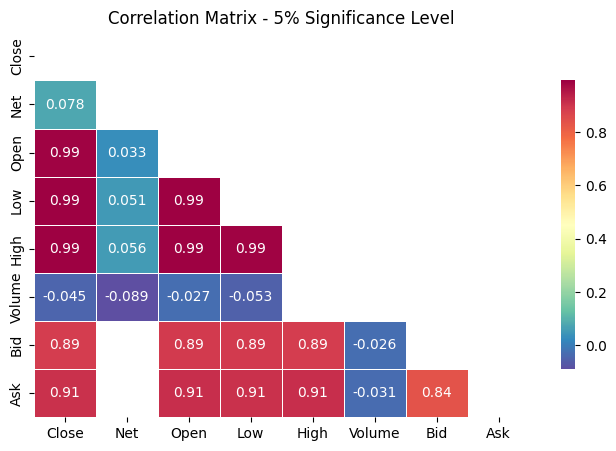

In [14]:
# Plot Correlation Matrix - With 0.05 Significance Level
correlation_matrix = A6.corr()
p_value_matrix = A6.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*A6.corr().shape)

# Set significance level
alpha = 0.05

# Create a mask for the upper triangle and non-significant correlations
mask_upper = np.triu(np.ones_like(correlation_matrix, dtype=bool))
mask_non_significant = p_value_matrix >= alpha
final_mask = mask_upper | mask_non_significant

# Plot correlation matrix
plt.figure(figsize=(8,5))
sns.heatmap(correlation_matrix, annot=True, cmap='Spectral_r',
            cbar_kws={"shrink": .75},
            linewidths=.5, mask=final_mask)

plt.title("Correlation Matrix - 5% Significance Level")
plt.show()

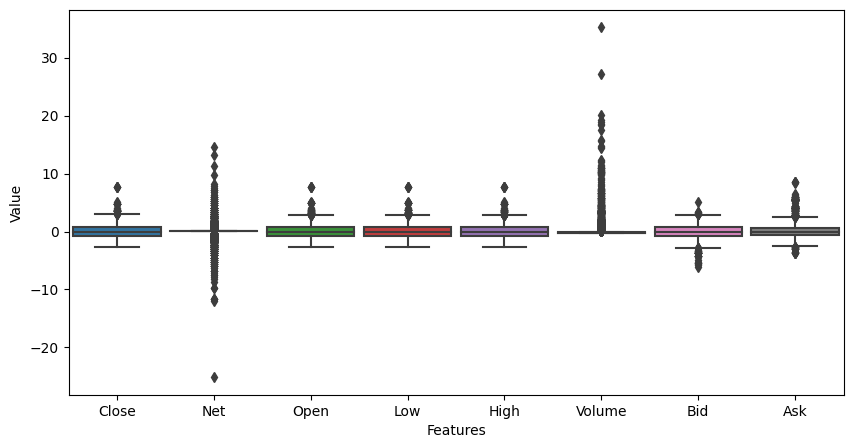

In [15]:
# applying standard scaling just to halp fitting all boxplots on the same grid

A6_num = A6.select_dtypes(include=['float64', 'int64'])

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(A6_num), columns=A6_num.columns)

df_A6_melted = df_scaled.melt(var_name='Features', value_name='Value')


# Create boxplot using seaborn
plt.figure(figsize=(10, 5))
sns.boxplot(x='Features', y='Value', data=df_A6_melted, width=0.90)
#plt.title("Boxplot of All Scaled Features")
plt.show()


For Close, Q1 = 5.76, Q3 = 5.98, IQR = 0.22000000000000064
Outliers for Close are: [7.   7.   7.   7.   6.33 6.33 6.33 6.33 6.33 6.33 6.33 6.32 6.62 6.6
 6.32 6.32 6.32 6.32 6.32 6.38 6.38 6.38 6.38 6.4  6.4  6.4  6.4  6.47
 6.58 6.58 6.58 6.58 6.58 6.58 6.58 6.58 6.58 6.41 6.41 6.41 6.41 6.43
 6.45 6.33 6.33 6.33 6.33 6.33 6.38]



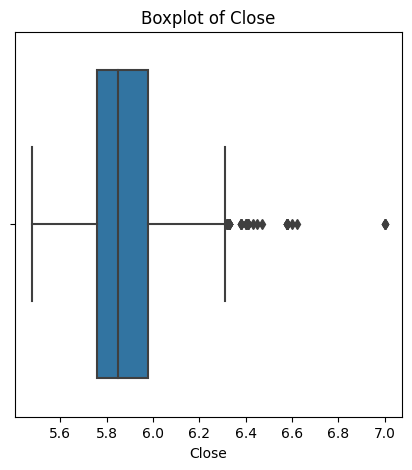

For Net, Q1 = 0.0, Q3 = 0.0, IQR = 0.0
Outliers for Net are: [-0.67 -0.01  0.3  ...  0.02 -0.01  0.01]



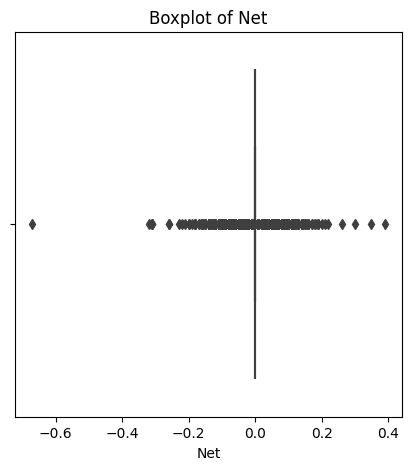

For Open, Q1 = 5.77, Q3 = 5.98, IQR = 0.21000000000000085
Outliers for Open are: [7.   7.   7.   7.   6.33 6.33 6.33 6.33 6.33 6.33 6.33 6.32 6.62 6.6
 6.32 6.32 6.32 6.32 6.32 6.31 6.3  6.3  6.3  6.37 6.37 6.37 6.37 6.4
 6.4  6.4  6.4  6.47 6.58 6.58 6.58 6.58 6.58 6.58 6.58 6.58 6.58 6.41
 6.41 6.41 6.41 6.43 6.45 6.3  6.3  6.3  6.3  6.3  6.3  6.3  6.3  6.3
 6.3 ]



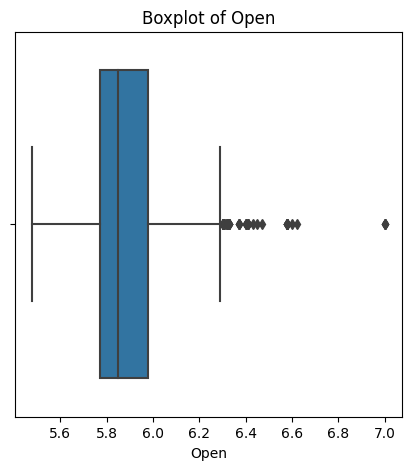

For Low, Q1 = 5.76, Q3 = 5.97, IQR = 0.20999999999999996
Outliers for Low are: [7.   7.   7.   7.   6.33 6.33 6.33 6.33 6.33 6.33 6.33 6.32 6.62 6.6
 6.32 6.32 6.32 6.32 6.32 6.31 6.29 6.29 6.29 6.37 6.37 6.37 6.37 6.4
 6.4  6.4  6.4  6.47 6.58 6.58 6.58 6.58 6.58 6.58 6.58 6.58 6.58 6.41
 6.41 6.41 6.41 6.43 6.45 6.3  6.3  6.3  6.3  6.3  6.3  6.3  6.3  6.3
 6.3 ]



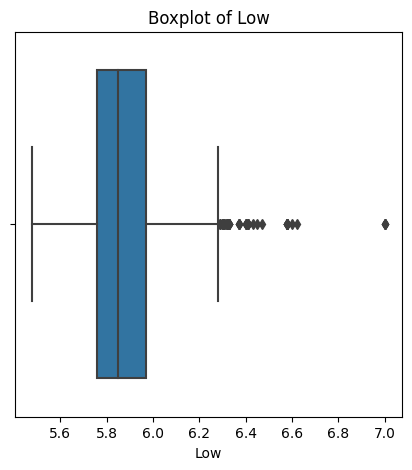

For High, Q1 = 5.77, Q3 = 5.98, IQR = 0.21000000000000085
Outliers for High are: [7.   7.   7.   7.   6.33 6.33 6.33 6.33 6.33 6.33 6.33 6.32 6.62 6.6
 6.32 6.32 6.32 6.32 6.32 6.31 6.3  6.3  6.3  6.38 6.38 6.38 6.38 6.4
 6.4  6.4  6.4  6.47 6.58 6.58 6.58 6.58 6.58 6.58 6.58 6.58 6.58 6.41
 6.41 6.41 6.41 6.43 6.45 6.33 6.33 6.33 6.33 6.33 6.3  6.3  6.3  6.3
 6.38 6.3  6.3  6.3  6.3  6.3  6.3  6.3  6.3  6.3  6.3  6.3  6.3  6.3 ]



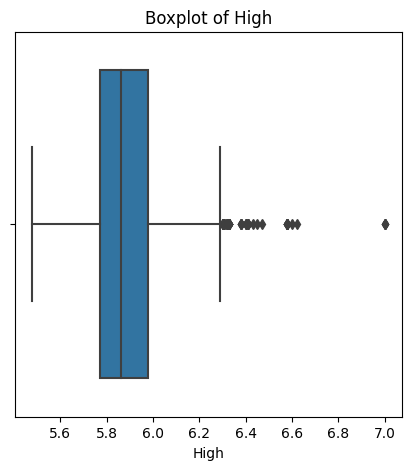

For Volume, Q1 = 0.0, Q3 = 2000.0, IQR = 2000.0
Outliers for Volume are: [ 6000.  6000. 18000. ... 28000.  8000. 13000.]



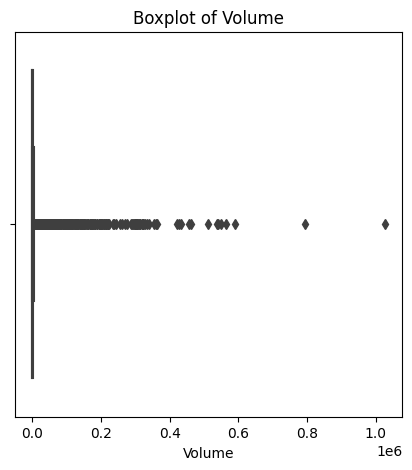

For Bid, Q1 = 5.73, Q3 = 5.95, IQR = 0.21999999999999975
Outliers for Bid are: [6.35 6.31 6.34 6.32 6.6  6.29 6.29 6.3  6.3  6.28 6.29 6.29 6.29 5.3
 5.2  5.28 5.28 5.3  5.02 5.28 5.28 5.02 5.2  5.21 5.28 5.35 5.2  5.2
 5.28 5.2  5.2  5.29 5.18 5.28 5.3  5.1  5.04 4.92 5.28 5.28 5.28 5.28
 5.03 4.99 4.97 5.32 5.32 5.32]



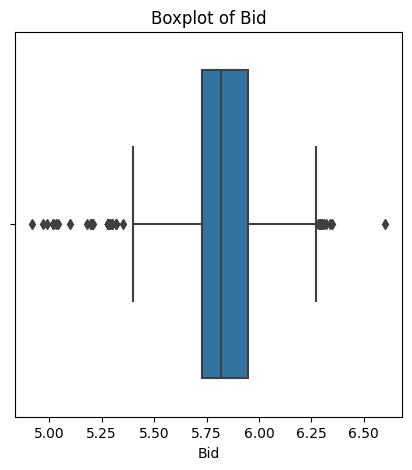

For Ask, Q1 = 5.79, Q3 = 6.0, IQR = 0.20999999999999996
Outliers for Ask are: [7.33 7.33 7.32 7.3  6.99 6.95 6.79 6.79 6.79 6.79 6.79 6.91 6.87 6.86
 6.86 6.84 6.84 6.84 6.84 6.82 6.82 6.82 6.82 6.82 6.82 6.81 6.81 6.81
 6.81 6.81 6.81 6.81 6.81 6.81 6.81 6.81 6.81 6.81 6.81 6.81 6.81 6.81
 6.71 6.62 6.62 6.62 6.62 6.62 6.62 6.62 6.61 6.6  6.6  6.6  6.59 6.58
 6.58 6.58 6.59 6.58 6.58 6.59 6.59 6.59 6.59 6.59 6.59 6.58 6.58 6.55
 6.47 6.58 6.58 6.58 6.58 6.58 6.58 6.42 6.58 6.58 6.57 6.44 6.58 6.59
 6.58 6.58 6.58 6.58 6.58 6.58 6.58 6.58 6.58 6.58 6.58 6.58 6.58 6.53
 6.53 6.52 6.57 6.55 6.56 6.56 6.44 6.5  6.56 6.53 6.52 6.51 6.39 6.38
 6.39 6.39 6.39 6.37 6.37 6.37 6.37 6.37 6.37 6.9  6.9  6.9  6.89 6.86
 6.84 6.82 6.59 6.35 6.32 6.59 6.6  6.59 6.49 6.38 6.38 6.5  6.5  6.5
 6.5  6.5  6.49 6.9  6.9  6.9  6.9  6.4  6.39 6.39 6.39 6.4  6.39 6.37
 6.39 6.39 6.33 6.33 6.33 5.46 5.42 5.42 5.41 5.41 5.28 5.28 5.28 5.4
 5.28 5.46 5.46 5.46 5.43 5.32 5.32 5.32 5.4  5.4  6.48 6.44 6.44 6.35]


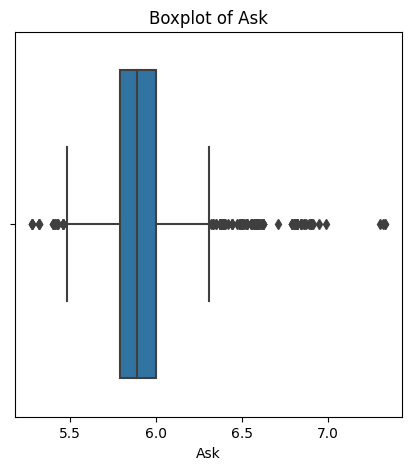

In [28]:

# Select Columns with numerical values --> excluding time and date

A6_num = A6.select_dtypes(include=['float64', 'int64'])


# Iterate over each column :

for column in A6_num.columns:
    # Calculate Q1, Q3 and IQR
    Q1 = A6_num[column].quantile(0.25)
    Q3 = A6_num[column].quantile(0.75)
    IQR = Q3 - Q1
    print(f"For {column}, Q1 = {Q1}, Q3 = {Q3}, IQR = {IQR}")

    # Identify outliers
    outliers = A6_num[(A6_num[column] < (Q1 - 1.5 * IQR)) | (A6_num[column] > (Q3 + 1.5 * IQR))]
    print(f"Outliers for {column} are: {outliers[column].values}\n")

    # Create boxplot to check for outliers
    plt.figure(figsize=(5, 5))
    sns.boxplot(x=A6_num[column])
    plt.title(f"Boxplot of {column}")
    plt.show()


Check for outliers existence

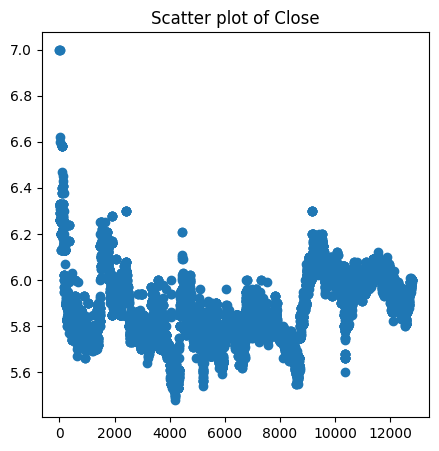

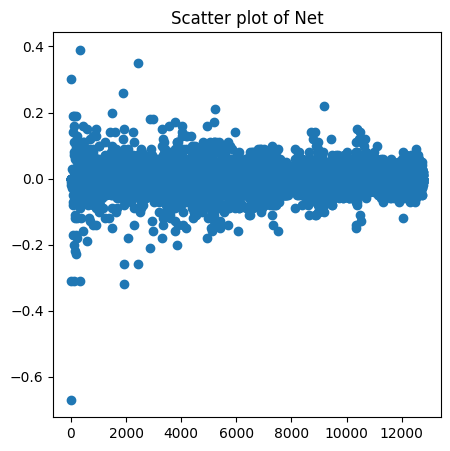

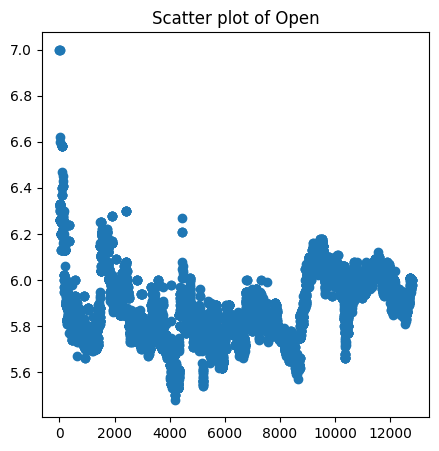

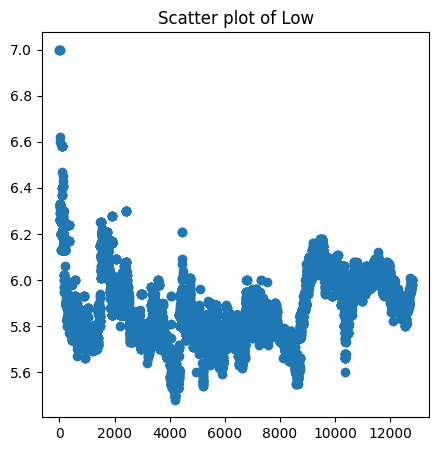

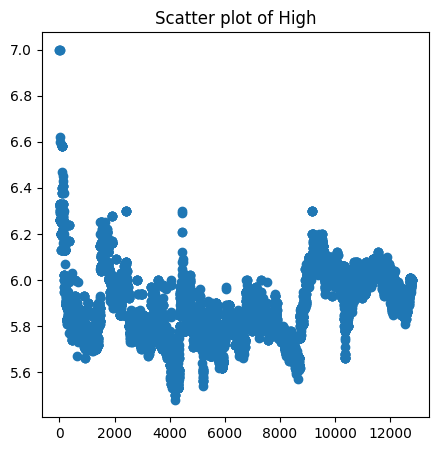

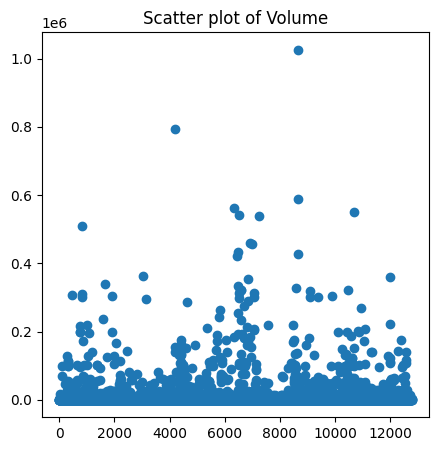

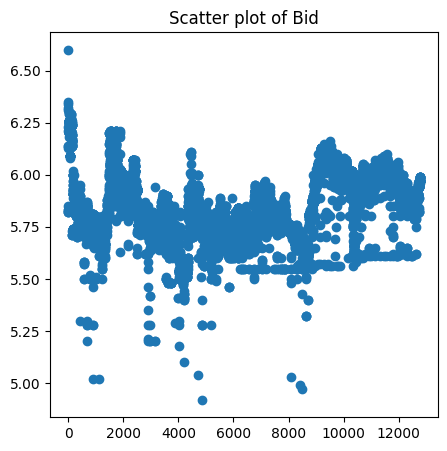

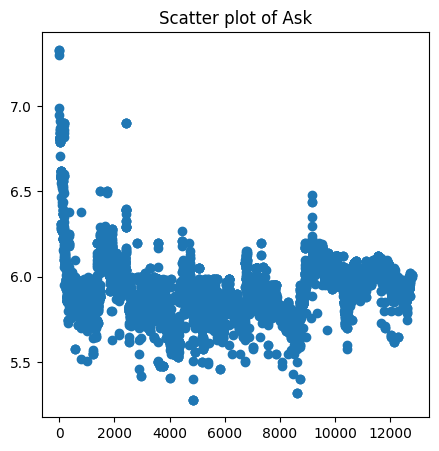

Close     2.166041e-02
Net       7.095471e-04
Open      2.136383e-02
Low       2.159397e-02
High      2.148445e-02
Volume    8.381113e+08
Bid       2.256210e-02
Ask       2.748443e-02
dtype: float64


In [29]:
# Scatter each variable for visual inspect of heteroscedasticity

for column in A6_num.columns:
    plt.figure(figsize=(5, 5))
    plt.scatter(range(len(A6_num)), A6_num[column])
    plt.title(f"Scatter plot of {column}")
    plt.show()


variances = A6_num.var()
print(variances)

<h3> <b>Feature Engineering </h3><hr>

<h5><b> Generate Technical Indicators</b></h5>
<li>Simple Moving Average (EMA)--> trend analysis indicator</li>
<li>Relative Strength Index (RSI)--> momentum indicator</li>
<li>Volume Weighted Average Price (VWAP) -->volume analysis indicator


In [ ]:

# Simple Moving Average - 10 previous periods
'''A6['SMA_10']=ta.SMA(A6['Close'], 10)

# Simple Moving Average - 5 previous periods

A6['SMA_5']=ta.SMA(A6['Close'], 5)

# Relative Strength Index

A6['RSI']= ta.RSI(A6['Close'])'''

# Generated but haven't been used in sign function


In [16]:
#Generated and used in signal function

# Volume Weighted Average Price (VWAP)

A6['VWAP'] = np.cumsum(A6['Volume'] * (A6['High'] + A6['Low']) / 2) / np.cumsum(A6['Volume']) # calculated for 14 period in prior, default period = 14.
A6.isnull().sum() # check for null in the VWAP

Local Date    0
Local Time    0
Close         0
Net           0
Open          0
Low           0
High          0
Volume        0
Bid           0
Ask           0
VWAP          3
dtype: int64

<h5><b>Generate Returns & Trade Sign</b></h5>

1.   Generate Return and Shifted Return<br>
     R = (R2 -R1) / R1
2.   Generate Trade sign <br>
     Coded as follows  



In [17]:
# Generate Return first

A6['return'] = A6['Close'].pct_change()

A6['return'] = A6['return'].fillna(0)

# Shift the return one cell above - to check which is better for signal generation

A6['Return_Shifted'] = A6['return'].shift(-1)
A6['Return_Shifted'] = A6['Return_Shifted'].fillna(0)


In [18]:
A6['Prev_Close'] = A6['Close'].shift(1) # Add previous closing price to the features


In [19]:
A6.isnull().sum() # check for null values


Local Date        0
Local Time        0
Close             0
Net               0
Open              0
Low               0
High              0
Volume            0
Bid               0
Ask               0
VWAP              3
return            0
Return_Shifted    0
Prev_Close        1
dtype: int64

In [20]:
AT= A6.dropna() # drop Null observations

In [21]:
# Generate signal Using Return and VWAP - after multiple trial of different combination of return and the generated Technical Indicators

# First, build signal generation function for each row

def generate_signal(row):
    if row['return'] > 0 or row['Close'] > row['VWAP']:
        # Positive return or  closing price >  VWAP, buy signal --> +1
        return 1
    elif row['return'] < 0 or row['Close'] < row['VWAP']:
        # Negative return and closing price below VWAP, sell signal --> -1
        return -1
    else:
        # Otherwise, return = 0 -->  no signal --> no loss +1
        return 1

# Apply the constructed function to generate signal for each observation within the data frame

AT['Signal'] = AT.apply(generate_signal, axis=1) # Column label --> Signal of -1 and 1 .

<ipython-input-21-27ec2600686e>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AT['Signal'] = AT.apply(generate_signal, axis=1) # Column label --> Signal


In [ ]:
#Gnerated as a trial, it could be further investigated to predict next trade sign
'''AT['Signal'] = AT['Signal'].shift(1)
AT.dropna(subset=['Signal'], inplace=True)


In [22]:
# Find counts of each class
signal_counts = AT['Signal'].value_counts()

print(signal_counts)


 1    7434
-1    5345
Name: Signal, dtype: int64


In [37]:
AT.isnull().sum() # Double check for null values

Local Date        0
Local Time        0
Close             0
Net               0
Open              0
Low               0
High              0
Volume            0
Bid               0
Ask               0
VWAP              0
return            0
Return_Shifted    0
Prev_Close        0
Signal            0
dtype: int64

In [38]:
AT.head(2) # Check all variables

,Local Date,Local Time,Close,Net,Open,Low,High,Volume,Bid,Ask,VWAP,return,Return_Shifted,Prev_Close,Signal
3,2023-01-03 01:31:00,2023-01-03 01:31:00,7.00,0.0,7.00,7.00,7.00,2000.0,5.83,7.30,7.0,0.000000,-0.095714,7.0,1
4,2023-01-03 01:32:00,2023-01-03 01:32:00,6.33,0.0,6.33,6.33,6.33,0.0,5.83,6.99,7.0,-0.095714,0.000000,7.0,-1


<h3><b> Target Variable & Feature Selection <b><h3><hr>

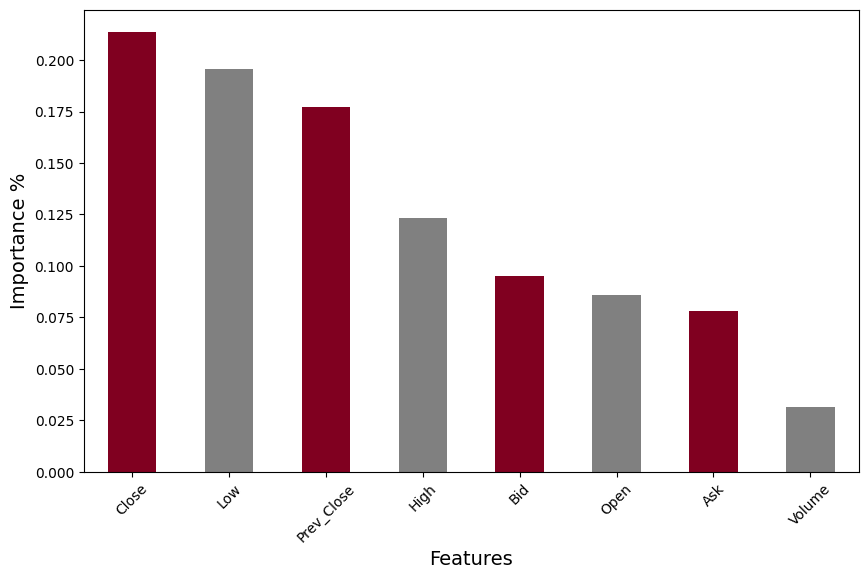

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Define features and target

X = AT.drop(['Local Time', 'Local Date','Return_Shifted','Signal','return','VWAP','Net'], axis=1)
y = AT['Signal']

# Initially split the data 30% testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize a Random Forest classifier - RFC
RF_imp = RandomForestClassifier(n_estimators=100, random_state=0)

# Train the classifier model
RF_imp.fit(X_train, y_train)

# Get feature importances
importances = RF_imp.feature_importances_

# Convert the importances into  1darray with corresponding data set column names as axis labels
f_importances = pd.Series(importances, X_train.columns)

# Sort the array in descending order of the importances
f_importances.sort_values(ascending=False, inplace=True)

# Make the bar Plot from f_importances

# Create bar chart of features importance, with burgundy and grey colors

colors = ['#800020' if i % 2 < 0.10 else 'grey' for i in range(len(f_importances))]


F_IMP = f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(10,6), rot=45, color=colors)
F_IMP.set_xlabel("Features", fontsize=14)
F_IMP.set_ylabel("Importance %", fontsize=14)

plt.show()
#plt.tight_layout()
#plt.show()


In [40]:
# Print the feature importances in percentage form
for feature, importance in f_importances.iteritems():
    print(f"The feature {feature} has an importance of {importance * 100:.2f}%")


The feature Close has an importance of 21.46%
The feature High has an importance of 20.07%
The feature Prev_Close has an importance of 13.29%
The feature Low has an importance of 13.09%
The feature Open has an importance of 8.31%
The feature Ask has an importance of 8.25%
The feature Bid has an importance of 7.25%
The feature Net has an importance of 5.85%
The feature Volume has an importance of 2.44%


<ipython-input-40-5a6dbbf44c82>:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for feature, importance in f_importances.iteritems():


In [24]:
# Check for correlation of features with the target variable.


# find correlations of Features

correlations = AT.corr()['Signal'].sort_values()

print(correlations)


VWAP             -0.233637
Return_Shifted   -0.096261
Volume           -0.022633
Net               0.152461
return            0.233948
Ask               0.483986
Bid               0.568384
Prev_Close        0.583703
Open              0.609509
Low               0.615015
High              0.618205
Close             0.626604
Signal            1.000000
Name: Signal, dtype: float64


<ipython-input-24-5b9e63ffd309>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = AT.corr()['Signal'].sort_values()


<b> <h2> Train -Test Split <hr>

In [25]:
# Select features and target variables

X = AT.drop(['Local Time', 'Local Date','Return_Shifted','Close','Signal','return','VWAP','Net'], axis=1)
y = AT['Signal']

# Split the data set into training and testing set of 30-70% testing, training sets, respectively...

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


<b> <h2> Data Scaling <hr>

In [26]:
# Scale the data using minmax scaler, range of 0, 1

scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit_transform(X_train)

# Transform both the training and testing data

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



In [44]:
AT.isnull().sum() #Double Check

Local Date        0
Local Time        0
Close             0
Net               0
Open              0
Low               0
High              0
Volume            0
Bid               0
Ask               0
VWAP              0
return            0
Return_Shifted    0
Prev_Close        0
Signal            0
dtype: int64

<b> <h2> Principal Component Analysis (PCA) <hr>

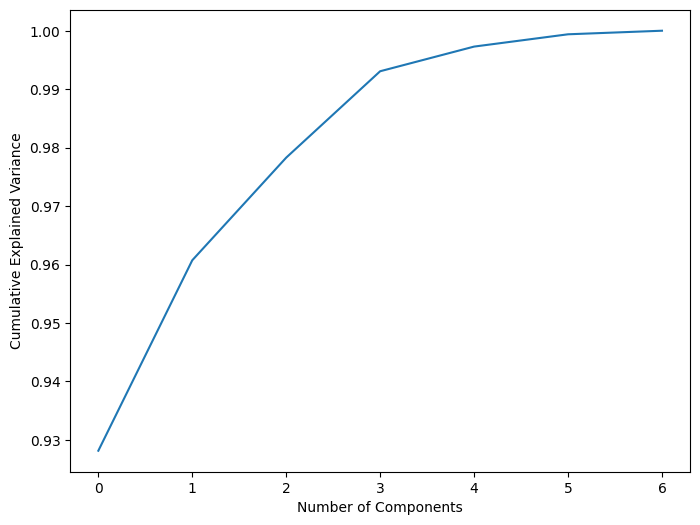

In [27]:
'''Check for PCA number of component,
after features are scaled already --> Correlation PCA '''

pca = PCA()
principalComponents = pca.fit_transform(X_train)

# Plotting  explained variance ratio, to determine # of components

plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


In [28]:
pca = PCA(n_components = 4) # Wait till excute the previous cell

# Fit the PCA model to the training data

X_train = pca.fit_transform(X_train)

# Transform the testing data

X_test = pca.transform(X_test)


<h3> <B> Random Forest Classifier <HR>


[link text](https://)<b>Check for spliting method


In [29]:

# Random Forest with 'gini' criterion
rfc_gini = RandomForestClassifier(criterion='gini', random_state=0)
rfc_gini.fit(X_train, y_train)

# Predicting and evaluating the 'gini' model
y_pred_gini = rfc_gini.predict(X_test)
print("Gini Model Accuracy:", accuracy_score(y_test, y_pred_gini))

# Random Forest with 'entropy' criterion
rfc_entropy = RandomForestClassifier(criterion='entropy', random_state=0)
rfc_entropy.fit(X_train, y_train)

# Predicting and evaluating the 'entropy' model
y_pred_entropy = rfc_entropy.predict(X_test)
print("Entropy Model Accuracy:", accuracy_score(y_test, y_pred_entropy))

Gini Model Accuracy: 0.9092331768388107
Entropy Model Accuracy: 0.9066249347939489


<b>Initial Training and Evaluation


In [30]:
%%time
# Initialize RF
RF_AT = RandomForestClassifier(n_estimators=100, random_state=0)
# Train the model
RF_AT.fit(X_train, y_train)

# Make predictions
RF_AT_pred = RF_AT.predict(X_test)

# Calculate accuracy
accuracy_RF_PCA = accuracy_score(y_test, RF_AT_pred)
print('Accuracy:', accuracy_RF_PCA)



Accuracy: 0.9092331768388107
CPU times: user 1.57 s, sys: 7.78 ms, total: 1.57 s
Wall time: 1.58 s


In [31]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

# Create Graph of the trees for the trained Random Forest model 'RF_AT'

num_features = X_train.shape[1]
feature_names = [f'feature_{i}' for i in range(num_features)]

num_trees_to_visualize = 0  #   Number of trees to visualize

for i in range(num_trees_to_visualize):
    tree = RF_AT.estimators_[i]
    dot_data = export_graphviz(tree, out_file=None,
                               feature_names=feature_names,
                               class_names=list(map(str, RF_AT.classes_)),
                               filled=True, rounded=True)
    graph = pydotplus.graph_from_dot_data(dot_data)
    display(Image(graph.create_png()))


<b> Model Evaluation

In [32]:
from sklearn.metrics import confusion_matrix, classification_report

# Create and Print Confusion Matrix
Conf_Matrix_RF = confusion_matrix(y_test, RF_AT_pred)

print(Conf_Matrix_RF)

# Print classification Report
print(classification_report(y_test, RF_AT_pred))

[[1474  131]
 [ 217 2012]]
              precision    recall  f1-score   support

          -1       0.87      0.92      0.89      1605
           1       0.94      0.90      0.92      2229

    accuracy                           0.91      3834
   macro avg       0.91      0.91      0.91      3834
weighted avg       0.91      0.91      0.91      3834



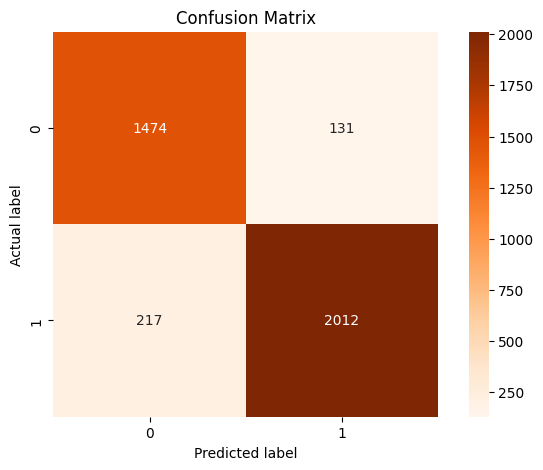

In [33]:
#plot the confusion matrix
confusion_matrix =confusion_matrix(y_test, RF_AT_pred)
plt.figure(figsize=(8, 5))
sns.heatmap(confusion_matrix, annot=True, fmt=".0f", square=True, cmap='Oranges')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

In [34]:
# Check  training acuuracy
y_train_pred = RF_AT.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))

# Check testing acuuracy
y_test_pred = RF_AT.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

Training Accuracy: 0.9944102850754611
Test Accuracy: 0.9092331768388107


<B> Hyperparameter Tuning - RFC

In [ ]:

# Define the parameter grid
parameter_grid = {
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize RFC Model
RF = RandomForestClassifier()

grid_search = GridSearchCV(estimator = RF, param_grid = parameter_grid,
                          cv = 3, n_jobs = -1, verbose = 2)

# Data already split
# Fit the grid search to the data frame
grid_search.fit(X_train, y_train)

# Find the best parameters
Best_Found_Params = grid_search.best_params_

print("Best parameters found: ", Best_Found_Params)


In [35]:
# Train the Model with the best found parameters

Best_Found_Params = {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
RF_best = RandomForestClassifier(n_estimators=Best_Found_Params['n_estimators'],
                                 max_features=Best_Found_Params['max_features'],
                                 max_depth= 10 , #Set manually, to prevent overfiiting
                                 min_samples_split=Best_Found_Params['min_samples_split'],
                                 min_samples_leaf= Best_Found_Params['min_samples_leaf'],
                                 criterion ='gini',
                                 random_state=0)

# Fit the model
RF_best.fit(X_train, y_train)



# Check performance on training data
y_train_pred = RF_best.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))

# Check performance on test data
y_test_pred = RF_best.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Training Accuracy: 0.921296813862493
Test Accuracy: 0.8969744392279604


<b> Tuned model Evaluation & Validation

              precision    recall  f1-score   support

          -1       0.85      0.91      0.88      1605
           1       0.93      0.89      0.91      2229

    accuracy                           0.90      3834
   macro avg       0.89      0.90      0.90      3834
weighted avg       0.90      0.90      0.90      3834



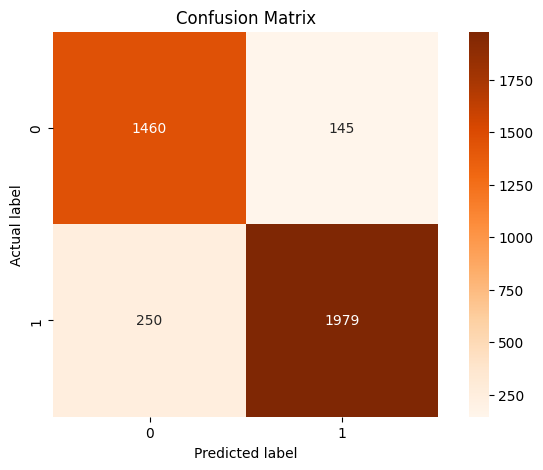

ROC AUC Score:  0.9635931903022883


In [36]:
# Evaluation of the model

# Classification report
print(metrics.classification_report(y_test, y_test_pred))

# Confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 5))
sns.heatmap(confusion_matrix, annot=True, fmt=".0f", square=True, cmap='Oranges')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

# Find the ROC AUC score
roc_auc_score = metrics.roc_auc_score(y_test, RF_best.predict_proba(X_test)[:, 1])
print('ROC AUC Score: ', roc_auc_score)


<b>Validation


In [37]:
# Validation  phase

# Define a K-fold cross validator
kfold = KFold(n_splits=10, random_state=0, shuffle=True)

# Perform K-fold cross-validation
scores = cross_val_score(RF_AT, X, y, cv=kfold)

# Print the mean score and the 95% confidence interval
print(f"Accuracy: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")

Accuracy: 0.95 (+/- 0.01)


In [38]:
# Split the data into 3 sets, to validate the model, and check is the model performs well on unseen data.

X = AT.drop(['Local Time', 'Local Date','Return_Shifted','Signal','return','VWAP'], axis=1)
y = AT['Signal']


# First split into training set (60%) and testing set of 40%

X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.4, random_state=0)

# Second split the testing set into testing and validation sets of 20% -20%.

X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=0)

# Create the scaler again

scaler = MinMaxScaler()

# Fit the scaler using the training data and then transform the training data

X_train = scaler.fit_transform(X_train)

# Transform both validation and test sets

X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [39]:
# Use the same model RF for validation

# Train the model on Training set of 20%

RF_best.fit(X_train, y_train)

# Validate the model (20%)

y_val_pred = RF_best.predict(X_val_scaled)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))

# Check Validation accuracy

y_test_pred = RF_best.predict(X_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))






/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Validation Accuracy: 0.9299687010954617
Test Accuracy: 0.9303599374021909


<hr> <hr>

<h3> <b>Support Vector Classifier - Comparable Model <hr>



In [40]:
# Use scaled and exclude PCA

# Same proceedures as the previous model :

# First, Select features and target variables

X = AT.drop(['Local Time', 'Local Date','Return_Shifted','Signal','return','VWAP','Net'], axis=1)
y = AT['Signal']

# Second, Split the data set into training and testing set of 30-70% testing, training sets, respectively...

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [41]:
# Third, Scale the data using minmax scaler, range of 0, 1

scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit_transform(X_train)

# Transform both the training and testing data

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#PCA is excluded, since it significantly decreases the model's performance (SVC)


<b> Initial Training & Evaluation

In [42]:
%%time
# Initialize the model

SVM_ = svm.SVC(kernel='rbf')
# Train the model
SVM_.fit(X_train, y_train)

# Make predictions
SVM_pred = SVM_.predict(X_test)

# Calculate accuracy
accuracy_A6_SVM = accuracy_score(y_test, SVM_pred)
print('Accuracy:', accuracy_A6_SVM)

Accuracy: 0.9003651538862807
CPU times: user 1.35 s, sys: 98.7 ms, total: 1.45 s
Wall time: 1.45 s


In [43]:
print(classification_report(y_test, SVM_pred))

              precision    recall  f1-score   support

          -1       0.87      0.89      0.88      1605
           1       0.92      0.91      0.91      2229

    accuracy                           0.90      3834
   macro avg       0.90      0.90      0.90      3834
weighted avg       0.90      0.90      0.90      3834



<b> Hyperparameter Tuning -  SVC


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define your SVC
svc = SVC()

# Define the parameter grid for the SVC
param_grid = {'C': [ 1, 10],
              'gamma': [1, 0.1, 0.01],
              'kernel': [ 'rbf', 'linear']}

# Create the GridSearchCV objct
grid_search = GridSearchCV(svc, param_grid, cv=5, verbose=3)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters: ", grid_search.best_params_)

# Print the best score
print("Best score: ", grid_search.best_score_)


In [44]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.svm import SVC

# Best parameters SVC instance
svc = SVC(C=10, gamma=1, kernel='rbf',probability=True, random_state=0)

# Fit the model to the training data
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

# Accuracy of test or predictions
print("Test Accuracy:", accuracy_score(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

# Print the classification report
print("Classification Report: \n", classification_report(y_test, y_pred))

# probability predictions
y_pred_prob = svc.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)
print('AUC Score:', auc_score)


Test Accuracy: 0.9042775169535733
Confusion Matrix: 
 [[1431  174]
 [ 193 2036]]
Classification Report: 
               precision    recall  f1-score   support

          -1       0.88      0.89      0.89      1605
           1       0.92      0.91      0.92      2229

    accuracy                           0.90      3834
   macro avg       0.90      0.90      0.90      3834
weighted avg       0.90      0.90      0.90      3834

AUC Score: 0.9589304956331787


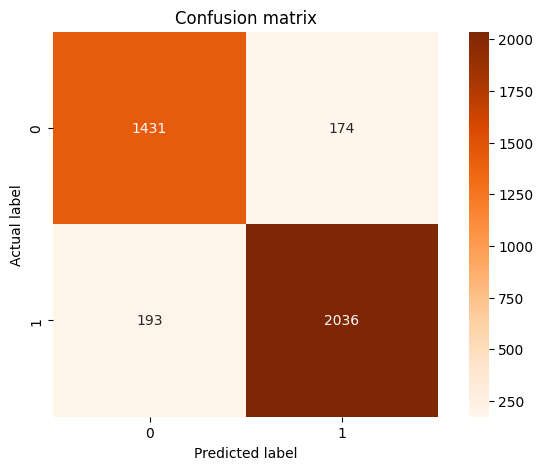

In [45]:
# Plot the confusion matrix

Conf_Matrix_SVC = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 5))
sns.heatmap(Conf_Matrix_SVC, annot=True, fmt=".0f", square=True, cmap='Oranges')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix')
plt.show()

<h3><b> Synthetic Data  </h3></b> <hr><br>  Generate a synthetic data frame to check if the model learns noise or real patterns; in our case, the accuracy and evaluation of the model trained on the synthetic data performed poorly, providing a proof of a non-stochastic model.

In [68]:
n = 10000
dt = 0.01  # Time step
mu = 0.01  # drift
sigma = 1  # volatility / sigma
start = 1  # initial condition

# Initialize DataFrame
df = pd.DataFrame(index=range(n))

# Generate GBM for Open prices
open_prices = np.zeros(n)
open_prices[0] = start
for i in range(n - 1):
    open_prices[i+1] = open_prices[i] + mu * open_prices[i] * dt + sigma * open_prices[i] * np.random.normal(0, 1) * np.sqrt(dt)
df['Open'] = open_prices

# Generate GBM for Close prices
close_prices = np.zeros(n)
close_prices[0] = start
for i in range(n - 1):
    close_prices[i+1] = close_prices[i] + mu * close_prices[i] * dt + sigma * close_prices[i] * np.random.normal(0, 1) * np.sqrt(dt)
df['Close'] = close_prices

# Generate offsets for High and Low prices
high_offsets = np.random.lognormal(mean=0.01, sigma=1, size=n)  # positive offsets
low_offsets = np.random.uniform(low=0, high=0.01, size=n)  # percentage offsets

# Calculate High and Low prices
df['High'] = np.maximum(df['Open'], df['Close']) + high_offsets
df['Low'] = np.minimum(df['Open'], df['Close']) * (1 - low_offsets)

# Ensure High is always >= Low
df['High'], df['Low'] = np.maximum(df['High'], df['Low']), np.minimum(df['High'], df['Low'])

In [69]:
df['Net']= df['Close'].diff()


In [70]:
df.dropna()

,Open,Close,High,Low,Net
1,1.031159e+00,1.063503e+00,4.861880,1.026295e+00,6.350321e-02
2,1.157397e+00,1.124112e+00,2.001567,1.116700e+00,6.060926e-02
3,1.220031e+00,1.260051e+00,3.229483,1.218282e+00,1.359388e-01
4,1.330861e+00,1.232056e+00,3.770840,1.221202e+00,-2.799503e-02
5,1.206224e+00,1.404453e+00,1.698520,1.204565e+00,1.723971e-01
...,...,...,...,...,...
9995,4.424750e-19,1.984056e-18,3.162575,4.400812e-19,6.016390e-21
9996,4.385886e-19,2.008026e-18,2.085295,4.373275e-19,2.397008e-20
9997,4.502117e-19,2.134970e-18,0.639293,4.481254e-19,1.269438e-19
9998,5.079324e-19,2.137626e-18,0.422529,5.040789e-19,2.655246e-21


In [71]:
df['Volume'] = np.random.lognormal(mean=10, sigma=2, size=n)  # could also be assigned to constant value


In [72]:
# Same proceedure to generate signal
df['VWAP'] = np.cumsum(df['Volume'] * (df['High'] + df['Low']) / 2) / np.cumsum(df['Volume'])


In [73]:
# Generate Return first
df['return'] = df['Close'].pct_change()

df['return'] = df['return'].fillna(0)

# Shift the return one cell above
df['Return_Shifted'] = df['return'].shift(-1)
df['Return_Shifted'] = df['Return_Shifted'].fillna(0)

In [74]:
df.head(2)

,Open,Close,High,Low,Net,Volume,VWAP,return,Return_Shifted
0,1.000000,1.000000,1.438157,0.999570,NaN,22742.006033,1.218864,0.000000,0.063503
1,1.031159,1.063503,4.861880,1.026295,0.063503,895.042257,1.284191,0.063503,0.056990


In [75]:
df.isnull().sum()
df= df.dropna()

In [76]:
# Generate signal Using Return and VWAP

# Define signal generation function
def generate_signal(row):
    if row['return'] > 0 or row['Close'] > row['VWAP']:
        # Positive return and closing price above VWAP, buy signal
        return 1
    elif row['return'] < 0 or row['Close'] < row['VWAP']:
        # Negative return and closing price below VWAP, sell signal
        return -1
    else:
        # Otherwise, no signal
        return 1

# Apply function to generate signals
df['Signal'] = df.apply(generate_signal, axis=1)


In [77]:
# Assign features and Target

X = df.drop(['Signal','VWAP','Return_Shifted','return','High','Low','Net'
               ], axis = 1 )

# Target, Y

Y = df['Signal']



In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0) # Same ratio data split

In [79]:
RF_AT.fit(X_train, y_train) #initiat Classifier

# Make predictions
RF_AT_pred = RF_AT.predict(X_test)

# Calculate accuracy
accuracy_RF_PCA = accuracy_score(y_test, RF_AT_pred)
print('Accuracy:', accuracy_RF_PCA)



Accuracy: 0.49566666666666664


In [80]:

# Print confusion matrix
print(confusion_matrix(y_test, RF_AT_pred))

# Print classification report
print(classification_report(y_test, RF_AT_pred))

# Calculate the ROC AUC score
roc_auc_score = metrics.roc_auc_score(y_test, RF_AT_pred)
print('ROC AUC Score: ', roc_auc_score)

[[715 771]
 [742 772]]
              precision    recall  f1-score   support

          -1       0.49      0.48      0.49      1486
           1       0.50      0.51      0.51      1514

    accuracy                           0.50      3000
   macro avg       0.50      0.50      0.50      3000
weighted avg       0.50      0.50      0.50      3000

ROC AUC Score:  0.4955324997199756


In [82]:
# Use the same 'best fit' RFC model - post hyperparameter tuning


Best_Found_Params = {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
RF_best = RandomForestClassifier(n_estimators=Best_Found_Params['n_estimators'],
                                 max_features=Best_Found_Params['max_features'],
                                 max_depth= 10 , #Set manually, to prevent overfiiting
                                 min_samples_split=Best_Found_Params['min_samples_split'],
                                 min_samples_leaf= Best_Found_Params['min_samples_leaf'],
                                 criterion ='gini',
                                 random_state=0)

# Fit the model
RF_best.fit(X_train, y_train)



# Check performance on training data
y_train_pred = RF_best.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))

# Check performance on test data
y_test_pred = RF_best.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
roc_auc_score = metrics.roc_auc_score(y_test, RF_AT_pred)
print('ROC AUC Score: ', roc_auc_score)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Training Accuracy: 0.6785255036433776
Test Accuracy: 0.49833333333333335
ROC AUC Score:  0.4955324997199756
